In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Reading the synthetic dataset
df = pd.read_csv('synthetic_manufacturing_data.csv')

In [3]:
df.head()

,Machine_ID,Temperature,Run_Time,Downtime_Flag,Hydraulic_Pressure,Coolant_Temperature,Spindle_Speed,Defect_Rate
0,M007,117.8,6.0,0,110.41,46.6,809,3.74
1,M020,98.2,15.8,0,122.54,79.7,3208,3.38
2,M015,108.6,10.7,0,170.29,52.7,2491,7.93
3,M011,110.7,4.0,0,105.28,25.3,771,4.13
4,M008,108.7,21.7,0,148.66,56.4,4142,6.95


In [4]:
# checking the shape
df.shape

(500, 8)

In [5]:
# Checking the statistical aspects of dataset
df.describe()

,Temperature,Run_Time,Downtime_Flag,Hydraulic_Pressure,Coolant_Temperature,Spindle_Speed,Defect_Rate
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,85.902000,12.562000,0.184000,149.226640,51.391000,2798.564000,5.340860
std,19.444724,6.691148,0.387872,29.335587,17.447972,1297.703763,4.183626
min,50.200000,1.000000,0.000000,100.020000,20.000000,502.000000,0.020000
25%,70.050000,6.800000,0.000000,122.822500,36.250000,1696.000000,2.067500
50%,87.050000,12.900000,0.000000,148.315000,52.800000,2969.500000,4.000000
75%,102.500000,18.125000,0.000000,174.945000,66.400000,3906.250000,8.412500
max,119.800000,24.000000,1.000000,199.710000,80.000000,4998.000000,14.950000


In [6]:
# Lets see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Machine_ID           500 non-null    object 
 1   Temperature          500 non-null    float64
 2   Run_Time             500 non-null    float64
 3   Downtime_Flag        500 non-null    int64  
 4   Hydraulic_Pressure   500 non-null    float64
 5   Coolant_Temperature  500 non-null    float64
 6   Spindle_Speed        500 non-null    int64  
 7   Defect_Rate          500 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 31.4+ KB


#### As we can see there is no null values and no binary(Yes/No) values

### Step-2 Data Preprocessing

 Since there is only one Object dtype and that too is Machine_ID so no need for `One Hot Encoding`

In [10]:
# Splitting the data into train and test
# Features will be X column and Target will be Y
X = df.drop(columns=['Downtime_Flag','Machine_ID'])  
y = df['Downtime_Flag']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Now lets come to Feature Scaling
scaler = StandardScaler()

X_train[['Temperature', 'Run_Time', 'Hydraulic_Pressure', 'Coolant_Temperature', 'Spindle_Speed', 'Defect_Rate']] = scaler.fit_transform(X_train[['Temperature', 'Run_Time', 'Hydraulic_Pressure', 'Coolant_Temperature', 'Spindle_Speed', 'Defect_Rate']])
X_train.head()

,Temperature,Run_Time,Hydraulic_Pressure,Coolant_Temperature,Spindle_Speed,Defect_Rate
249,1.404431,-1.714683,1.238265,0.863876,0.215403,2.159573
433,0.029600,-0.159004,-0.165986,-0.319400,0.765563,1.919579
19,0.655456,0.762321,0.797986,-0.065841,0.500556,-0.318726
322,-0.693725,-1.775098,-1.566201,0.396200,-0.519951,2.117941
332,0.650326,-0.264730,-0.529578,-0.099649,-0.499805,-0.208525


In [12]:
df1 = df.drop(['Machine_ID'],axis=1)

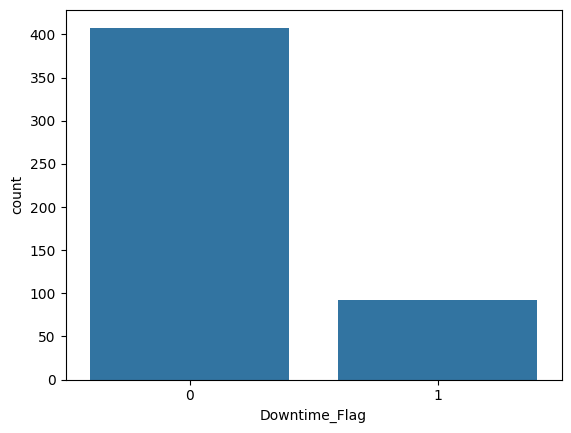

In [13]:
# Distribution of Downtime_Flag
sns.countplot(x='Downtime_Flag', data=df1)
plt.show()

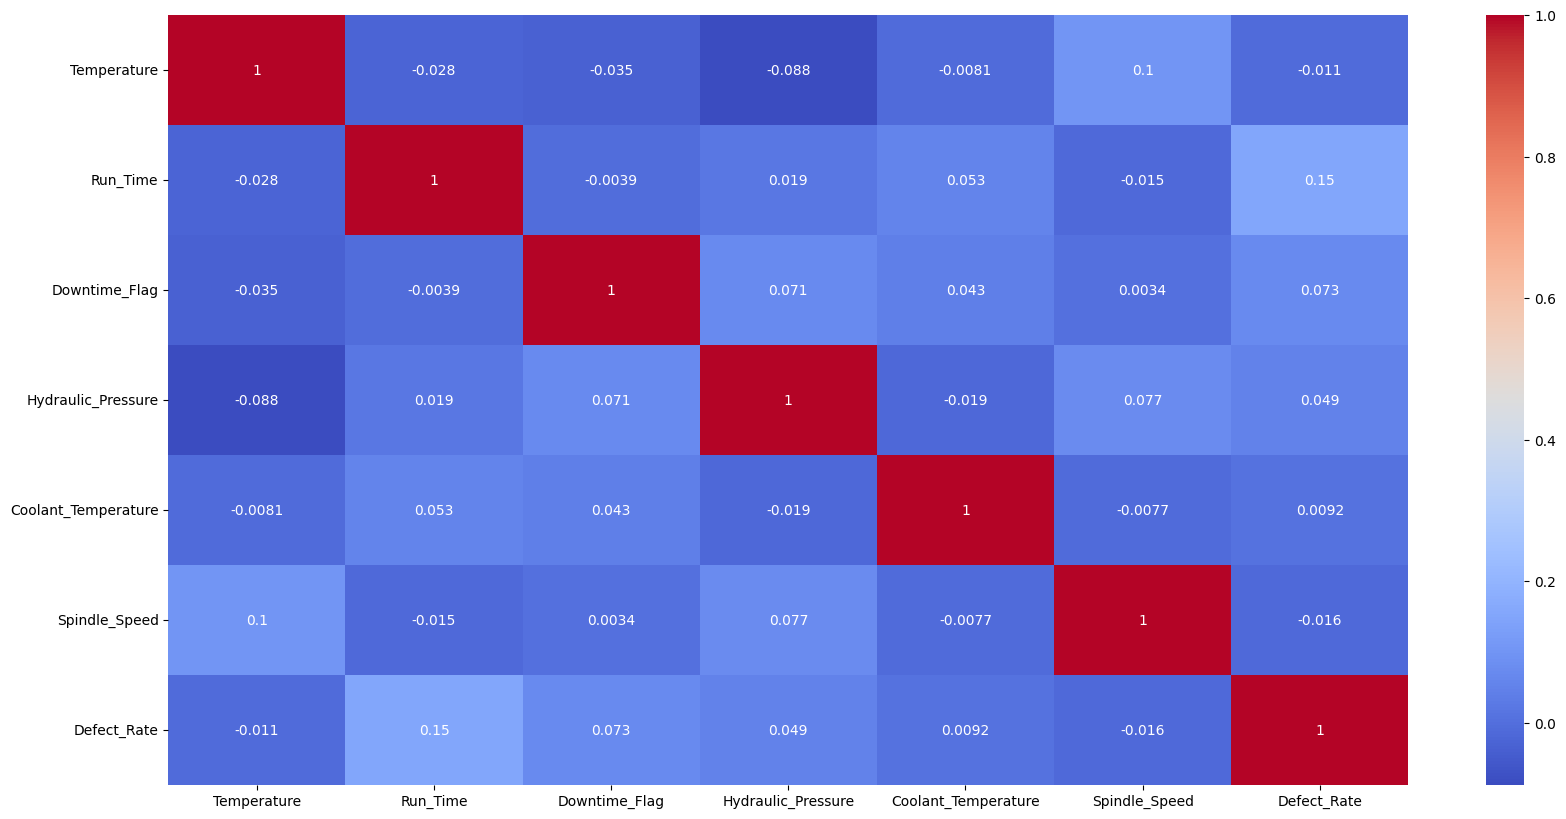

In [14]:
# Let's see the correlation matrix 

plt.figure(figsize = (20,10))        
sns.heatmap(df1.corr(),annot = True,cmap='coolwarm')
plt.show()

### Step-3 Building the Model

In [16]:
model = LogisticRegression()  

# Training the logistic regression model
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.79
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        81
           1       0.25      0.05      0.09        19

    accuracy                           0.79       100
   macro avg       0.53      0.51      0.48       100
weighted avg       0.71      0.79      0.73       100



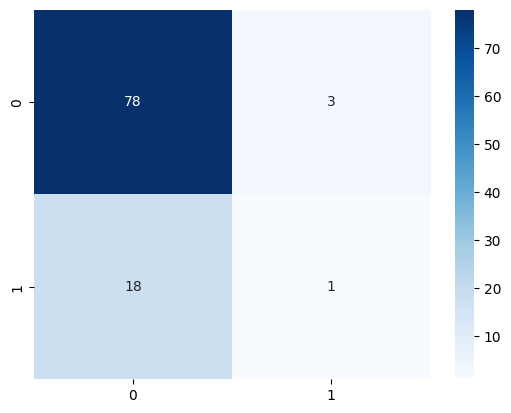

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200, 500]}

# GridSearch for Logistic Regression
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters and performance
print(grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_}")


{'C': 0.01, 'max_iter': 100}
Best Accuracy: 0.8175000000000001


Accuracy: 0.79
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        81
           1       0.25      0.05      0.09        19

    accuracy                           0.79       100
   macro avg       0.53      0.51      0.48       100
weighted avg       0.71      0.79      0.73       100



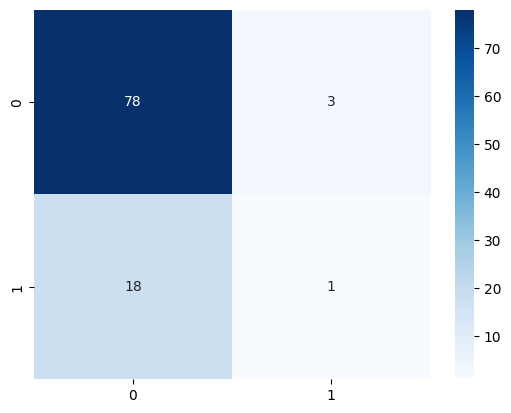

In [19]:
# Using the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Re-training the model with the optimal hyperparameters
best_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = best_model.predict(X_test)

# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


Accuracy: 0.76
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        81
           1       0.22      0.11      0.14        19

    accuracy                           0.76       100
   macro avg       0.52      0.51      0.50       100
weighted avg       0.70      0.76      0.72       100



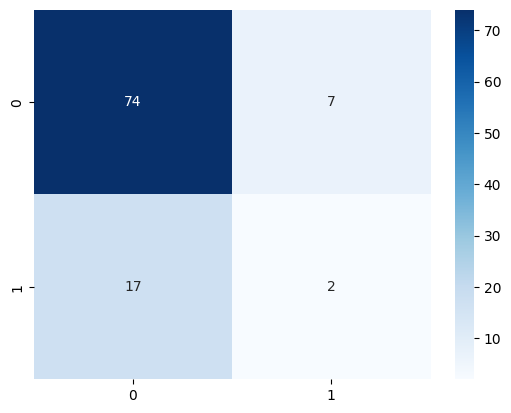

In [20]:
best_model = LogisticRegression(class_weight='balanced', C=0.01, max_iter=100)
best_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


We get lower accuracy with the model so lets see Decision Trees also

In [30]:
# Initializing the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fitting the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.81
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        81
           1       0.00      0.00      0.00        19

    accuracy                           0.81       100
   macro avg       0.41      0.50      0.45       100
weighted avg       0.66      0.81      0.72       100



C:\Windows\System32\tensorflow-env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\System32\tensorflow-env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\System32\tensorflow-env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


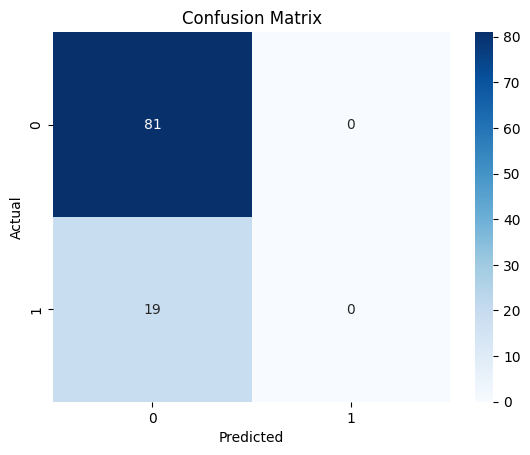

In [32]:
# Predictions on the test set
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Defining hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters and performance
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.8175000000000001


Accuracy: 0.81
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        81
           1       0.00      0.00      0.00        19

    accuracy                           0.81       100
   macro avg       0.41      0.50      0.45       100
weighted avg       0.66      0.81      0.72       100



C:\Windows\System32\tensorflow-env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\System32\tensorflow-env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Windows\System32\tensorflow-env\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


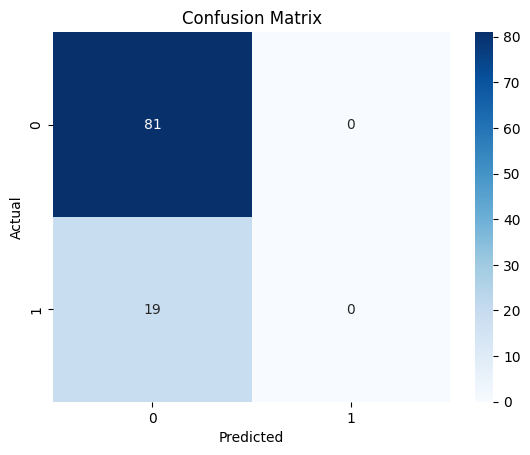

In [45]:
# Getting the best model from the grid search
best_dt_model = grid_search.best_estimator_

# Fitting the best model on the training data
best_dt_model.fit(X_train, y_train)

# Evaluating the model
y_pred = best_dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We Got higher Accuracy with Decision Trees, So lets save the model

## Saving the Model

In [47]:
import joblib

# Save the model
joblib.dump(best_dt_model, 'machine_downtime_predictor.pkl')

# Load the model later for predictions
loaded_model = joblib.load('machine_downtime_predictor.pkl')